# Yabble's AI Test

Hello! Given the rise of code generation LLMs traditional coding tests are completely useless these days. So we've come up with something that should be hard for an AI to code without some sort of direction from a human, so this means this test is really about giving you a problem and seeing how you

- Solve a problem with LLMs, and
- Communicate this solution.

We're mainly see want to see a proof-of-concept so doesn't need to be an end-to-end working solution. Just a sketch so we can see your thinking behind your solution.

Fork this repo and send us a link when you are done to alex@yabble.com

## The Problem

As part of this repo we have supplied a dataset `walmart.csv` there are 3 columns of open text responses. The task is to perform, what the market research community call, "theme counting" or "thematic analysis: on one or all of these columns. A brief definition of this task might be:

> [Thematic analysis](https://fastercapital.com/content/Thematic-Analysis--Uncovering-Patterns--Thematic-Analysis-in-Qualitative-Research.html) is a qualitative research technique that involves systematically identifying, analyzing, and reporting patterns (themes) within textual, visual, or audio data. It is widely used in marketing research to explore consumer opinions, sentiments, and experiences. Researchers begin by immersing themselves in the data, identifying recurring patterns, and organizing them into meaningful themes.

### Example

So a basic example would be if you had 3 responses from the dataset column "What do you think Target does better than Walmart?":
1. "Their overall approach to customers and the benefits of supporting the community and it's employees"
2. "Target has a better variety"
3. "Employees are more helpful and the stores are much cleaner and better organized"
4. "They have more in style things and the employees are nice"

So you might tags these with "themes" as follows:
1. Customer support; Supports Community; Supports Employees
2. Variety
3. Customer support; Clean stores; Well Organised
4. Variety; Customer support

The idea with themes is to group responses to make further porcess easier. You need to find a balance between having general themes while at the same time capturing enough neuonce for the themes to be useful.

Bonus marks for adding sentiment to your themes so the same theme can ether be positive, negative or neutral i.e. Customer Service (positive) or Customer Service (Negative) etc

### Please...
- Document your code and your thinking.
- Doesn't have to be perfect, show the experiments you did to get to where you ended up.
- Link to external sources of inspiration.
- Write a "Summary" at the begining which outlines your approch(es)
- Write a "Conclusion" section at the end.

Good luck!



---



# Table Content

- [Summary](#summary)
- [Experimental Procedures](#experimental-procedures)
- [The Data](#the-data)
- [Data Clean](#data-clean)
- [Preprocessing Sentence](#preprocessing-sentence)
- [NMF and LDA Model Analysis](#nmf-and-lda-model-analysis)
- [Generate Phrases](#generate-phrases)
- [Sentiment Analysis - BERT fine-tuned model and NLTK (VADER)](#sentiment-analysis---bert-fine-tuned-model-and-nltk-vader)
  - [NLTK (VADER)](#nltk-vader)
  - [BERT fine-tuned model](#bert-fine-tuned-model)
- [Visualization and Merge Dataframe](#visualization-and-merge-dataframe)
- [Reference](#reference)

<a id="summary"></a>
## Summary



This study aims to explore how to combine natural language processing (NLP) methods and insights inspired by large language models (LLMs) for topic modeling. Unlike modern black-box deep learning methods, traditional methods require manual preprocessing and construction of fixed phrase templates. To address this problem, we use the nltk library as the main text processing tool and compare two topic modeling strategies: TF-IDF vectorizer + NMF and Count vectorizer + LDA.

The TF-IDF + NMF method is proven to be more suitable for short texts and can effectively identify rare but semantically important keywords, resulting in clearer and more interpretable topic combinations. In contrast, Count Vectorizer + LDA (a probabilistic model based on word frequency) tends to highlight high-frequency words and is more suitable for capturing direct emotional clues, but its output results are relatively rough and need further refinement.

After extracting the keywords of each sentence, this study applied the traditional rule-based NLP processing method, that is, using NLTK to generate meaningful phrases through part-of-speech tagging, and combining words according to patterns such as adjective + noun, noun + noun, verb + noun, etc., while processing common negative or special semantic structures. While this approach generates some natural phrase patterns, it is still not smooth enough for natural language processing and there is still room for further optimization.

For sentiment analysis, the study compared two methods: NLTK's VADER and a fine-tuned BERT model. VADER is a rule-based sentiment analyzer that uses a predefined lexicon and often has difficulty handling long sentences, sarcasm, and negation due to its limited contextual awareness. The BERT-based model, on the other hand, is fine-tuned for sentiment classification and uses Transformer to encode full sentences, making full use of deep contextual understanding to be able to interpret sentiment more accurately.

## Experimental procedures
<a name="experimental-procedures"></a>

My initial goal was to extract topics from Walmart user feedback using classic NLP techniques. I initially considered processing from sentences to words, so I used the NLTK library as the basic tool for data processing. It supports word segmentation, part-of-speech tagging, stop word filtering, and lemmatization, laying a clean and standardized corpus foundation for subsequent modeling.


First, I used the TF-IDF + NMF algorithm because it performs well in short text processing. I used NLTK to clean and lemmatize the text, and then converted the documents into TF-IDF vectors. This method works well in identifying rare but meaningful words. In order to adapt to short text features, I control the model's ability to handle sparse words by adjusting the parameters of TfidfVectorizer, such as min_df=1 (keep low-frequency words), max_df=0.95 (remove words that appear too often), and max_features=3000 (limit word vector dimensions).


During the NMF modeling process, I tried different n_topics values, ranging from 2 to 12, and found the local optimal number of topics by plotting the Coherence Score curve. Usually, different score peaks will appear in n_topics depending on the quantity and quality of the data.


For comparison, I also used the CountVectorizer + LDA model, which is a generative model that models topic distribution based on word frequency. Unlike TF-IDF, LDA prefers high-frequency words, so when dealing with sparse short texts, some rare but meaningful words may be lost. In the experiment, I also adjusted the min_df, max_df, and n_topics parameters of CountVectorizer and evaluated the model effect through Gensim's CoherenceModel. Although LDA is not as interpretable as NMF, it still has advantages in extracting common topics (such as "service", "employee", "commodity").


At first, I tried to use the model to extract the most relevant topic words. I found that with the current amount of data, it is impossible to extract the actual keywords of each data, but more of the theme of the entire dataset. So I tried to extract relevant keywords from each data, which is more segmented than putting the entire dataset into the model for unified analysis. I used the TF-IDF score of each row to extract the most relevant keywords for each text, and compared them with the keywords extracted by the model.


Since most of the extracted keywords are single words and cannot form understandable phrases, I further used part-of-speech tagging to construct phrases. Combining keywords through rules such as adjective + noun, verb + noun, and negative structure makes them more linguistically expressive. For example, concatenating rude and employee into rude employee significantly enhances readability.


For sentiment analysis, I initially used NLTK's VADER, but found that it had low accuracy when dealing with long sentences, double negation, or sarcastic expressions. Therefore, I switched to the BERT fine-tuned model distilbert-base-uncased-finetuned-sst-2-english, which significantly improved the contextual understanding ability of complex user feedback. The BERT model tokenizes and encodes the input, and classifies the sentiment of the sentence based on the context, outputting labels such as positive/negative and confidence.


Although the whole process is not perfect, I tried different modeling strategies and performed parameter tuning verification, and finally found a better model combination: TF-IDF + NMF for topic analysis and BERT for sentiment analysis. I also realized that LDA is still valuable in discovering high-frequency topic words, but its interpretability needs to be improved through post-processing.


Overall, the results of using NMF or LDA still have some shortcomings. For example, in complain data, the model often retains complain and ignores the negative word no, thus misjudging the semantic direction. This suggests that in the future, I can combine dependency syntactic analysis or context-aware models to assist topic identification and sentiment judgment, making the NLP process more semantically accurate.



---





In [8]:
#lib install
!pip install bertopic scikit-learn matplotlib pandas numpy nltk umap-learn sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.36.2
    Uninstalling transformers-4.36.2:
      Successfully uninstalled transformers-4.36.2


In [7]:
!pip install gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [1]:
from google.colab import files
import numpy as np
import re
from itertools import combinations, permutations

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import wordnet

In [ ]:
import pandas as pd

In [2]:
from IPython.display import display

In [3]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print(np.__version__)

1.26.4


In [8]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')
# nltk.download('averaged_perceptron_tagger')

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

## The data
<a name="the-data"></a>

The data is a typical CSV we migth get from a client. Column labels are the survey question text.

In [ ]:
import csv

with open("walmart.csv") as fp:
    reader = csv.DictReader(fp)
    data = [row for row in reader]

data[:3]

In [ ]:
# colab upload file
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


Saving walmart.csv to walmart (2).csv


In [ ]:
print(display(df.head()))

,Session ID,Date started,"Imagine you are writing a complaint letter to the head of Walmart...in detail, tell us the things you would complain about and why they matter?",What do you think Target does better than Walmart?,What do you LOVE most about Walmart?,Gender,Age group,State,Who does it better? Target or Walmart?
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,NaN,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,NaN,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,NaN,The low price,Male,25-34,Texas,Walmart


None


## Data Clean
<a name="data-clean"> </a>
The load_and_preprocess method performs basic preprocessing on the text columns in the DataFrame in order to prepare for subsequent text analysis. For columns of type string, it first outputs the dimensions and column names of the dataset and checks for missing values.
The clean_text cleaning method includes: converting the text to lowercase, removing numbers, special characters, and extra spaces, and retaining only clean English letters. Such preprocessing can effectively improve the accuracy and consistency of subsequent tasks such as topic modeling and sentiment analysis.

In [ ]:
# clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()


# init data with base processing
def load_and_preprocess(input_df):
    print(f"dataset shape: {input_df.shape}")
    print(f"dataset column name: {input_df.columns.tolist()}")
    print("===================================================================")
    # nan value check
    if input_df.isnull().values.any():
        print(f"Missing value count per column:\n{input_df.isnull().sum()}")
    print("===================================================================")
    # clean text
    for col in input_df.columns:
      if input_df[col].dtype == 'object':
        sample = input_df[col].dropna().sample(min(5, len(input_df[col].dropna()))).tolist()
        if any(isinstance(x, str) and len(x.split()) > 5 for x in sample):
          # clean_text
          input_df[col] = input_df[col].apply(lambda x: clean_text(x) if isinstance(x, str) else x)

load_and_preprocess(df)

dataset shape: (253, 9)
dataset column name: ['Session ID', 'Date started', 'Imagine you are writing a complaint letter to the head of Walmart...in detail, tell us the things you would complain about and why they matter?', 'What do you think Target does better than Walmart?', 'What do you LOVE most about Walmart?', 'Gender', 'Age group', 'State', 'Who does it better? Target or Walmart?']
Missing value count per column:
Session ID                                                                                                                                           0
Date started                                                                                                                                         0
Imagine you are writing a complaint letter to the head of Walmart...in detail, tell us the things you would complain about and why they matter?      0
What do you think Target does better than Walmart?                                                                          

In [ ]:
# split data with question
df_complain = df.iloc[:, 2].to_frame(name='complain')
df_improve = df.iloc[:, 3].dropna().to_frame(name='improve')
df_recommend = df.iloc[:, 4].to_frame(name='recommend')

# copy to new dataframe
df_complain = df_complain.copy()
df_improve = df_improve.copy()
df_recommend = df_recommend.copy()

## Preprocessing sentence
<a name="preprocessing-sentence"></a>

process_sentence is used to perform standardized preprocessing on the original English text, so as to obtain more effective text features in subsequent natural language processing tasks. First, the function receives a piece of English text and uses TreebankWordTokenizer to tokenize it and cut the text into individual words. Then, the method removes redundant words (such as "the", "you", "be", "would", etc.) that do not contribute semantically by judging whether the word is composed of pure letters (removing numbers, punctuation, etc.) and matching the English stop word list to reduce noise interference. After retaining meaningful words, use nltk.pos_tag to tag each word with a part-of-speech tag, and convert these tags into the part-of-speech tag format required by WordNet through the custom get_wordnet_pos function. Then, with the help of WordNetLemmatizer, the words such as "running", "was", "better" are restored to their basic forms "run", "be", "good" to achieve the merging of synonyms and unified semantic expression. Finally, all processed words are reassembled into a space-delimited standard text string as the cleaned output result.

In [ ]:
# POS conversion
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
      return wordnet.ADJ
  elif treebank_tag.startswith('V'):
      return wordnet.VERB
  elif treebank_tag.startswith('N'):
      return wordnet.NOUN
  elif treebank_tag.startswith('R'):
      return wordnet.ADV
  else:
      return wordnet.NOUN

def process_sentence(text):
  tokenizer = TreebankWordTokenizer()
  tokens = tokenizer.tokenize(text)
  stop_words = set(stopwords.words('english') + [
      'would', 'could', 'also', 'get', 'got', 'one', 'they', 'you', 'your',
      'the', 'and', 'to', 'of', 'for', 'it', 'i', 'me', 'we', 'us', 'them',
      'their', 'this', 'that', 'is', 'are', 'was', 'were', 'be', 'been'
  ])
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  tagged = pos_tag(tokens)
  tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]
  return ' '.join(tokens)


## NMF and LDA Model Analysis
<a name="nmf-and-lda-model-analysis"></a>

This set of methods constitutes a complete text topic modeling and keyword extraction process, covering from text preprocessing, vectorization (TF-IDF and CountVectorizer), to topic modeling using LDA and NMF, and selecting the optimal number of topics in combination with the topic consistency score (Coherence Score).

The **prepare_input_tf** method uses TF-IDF preprocessing and converts it into a TF-IDF vector matrix using TfidfVectorizer. The data processing of this method will be used in the NMF model later. Assign weights to the words in the sentence by the frequency of occurrence.

The **prepare_input_count** method uses CountVectorizer, which only considers the number of times a word appears in a document, and does not calculate the inverse document frequency. This matrix will be used in the subsequent LDA model.

The **compute_coherence_scores** method uses the CoherenceModel provided by Gensim to evaluate the LDA model trained under different numbers of topics (2~12) and select the optimal number of topics. Fit document vectors with LDA. Extract keywords for each topic. Use the `c_v` consistency score to evaluate the semantic coherence between topics.

The **compute_coherence_scores_nmf** method calculates the NMF consistency score. NMF is based on matrix factorization and obtains keywords through coefficients. The Coherence mechanism of Gensim is used to evaluate the results.
The model_process method is used as the core method to call and process two models. The LDA or NMF method is selected by passing in the model to build a topic model. The dominant topic of each row of data, that is, the word with the highest probability, is extracted, and the keywords of the topic are obtained. The keyword list of the data, the most likely topic number, and the topic probability are returned.

For the **LDA** model, the probability distribution of each document belonging to each topic is obtained through `lda_model.transform()`, and the topic and its keywords are obtained from `components_`.

For the **NMF** model, W = model.fit_transform(X) is directly used to obtain the document topic matrix, each row is the topic distribution, and then the keywords are extracted in combination with TF-IDF.
、

In [ ]:
def prepare_input_tf(input_df, text_col):
    corpus = input_df[text_col].fillna('').astype(str).apply(process_sentence).tolist()
    texts = [doc.split() for doc in corpus]
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, max_features=3000, stop_words='english')

    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return corpus, texts, X, feature_names, vectorizer


def prepare_input_count(input_df, text_col):
    corpus = input_df[text_col].fillna('').astype(str).apply(process_sentence).tolist()
    texts = [doc.split() for doc in corpus]
    vectorizer = CountVectorizer(max_df=0.95, min_df=1, max_features=3000, stop_words='english')

    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return corpus, texts, X, feature_names, vectorizer


In [ ]:
def compute_coherence_scores(texts, X, vectorizer, start=2, limit=12, step=1):
    dictionary = Dictionary(texts)
    doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

    best_score = -1
    best_model = None
    best_n = None
    all_scores = []

    for n_topics in range(start, limit, step):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(X)

        topics = [
            [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
            for topic in lda_model.components_
        ]
        coherence_model = CoherenceModel(
            topics=topics, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        score = coherence_model.get_coherence()
        all_scores.append((n_topics, score))

        if score > best_score:
            best_score = score
            best_model = lda_model
            best_n = n_topics

    return best_model, best_n, all_scores

In [ ]:
def compute_coherence_scores_nmf(texts, X, vectorizer, start=2, limit=12, step=1):
    dictionary = Dictionary(texts)
    doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

    best_score = -1
    best_model = None
    best_n = None
    all_scores = []

    for n_topics in range(start, limit, step):
        nmf_model = NMF(n_components=n_topics, random_state=42)
        W = nmf_model.fit_transform(X)

        topics = [
            [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
            for topic in nmf_model.components_
        ]

        # create coherence model by token list & dictionary
        coherence_model = CoherenceModel(
            topics=topics, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        score = coherence_model.get_coherence()

        all_scores.append((n_topics, score))

        if score > best_score:
            best_score = score
            best_model = nmf_model
            best_n = n_topics
    return best_model, best_n, all_scores

In [ ]:
def model_process(df_input, topic_col_name, corpus, texts, X, feature_names, vectorizer, n_topics=8, method='lda'):
  df_clean = df_input[df_input[topic_col_name].notna() &
                      (df_input[topic_col_name].str.strip() != '')].copy()
  df_clean = df_clean.reset_index(drop=True)

  df_name = f'doc_keywords_{topic_col_name}_{method}'
  n_top_words = 5
  import matplotlib.pyplot as plt
  if method.lower() == 'lda':
      lda_model, best_n_topics, scores = compute_coherence_scores(texts, X, vectorizer)
      model = lda_model
      W = model.transform(X)
      model_name = "LDA"

      top_keywords_per_doc = []
      topic_indices = []
      topic_probs = []

      # plot topic
      topic_nums = [x[0] for x in scores]
      scores = [x[1] for x in scores]
      plt.figure(figsize=(10, 6))
      plt.plot(topic_nums, scores, marker='o', linestyle='-')
      plt.xlabel("Number of Topics")
      plt.ylabel("Coherence Score")
      plt.title(f'Coherence Score vs Number of Topics (LDA) - {topic_col_name}')
      plt.xticks(topic_nums)
      plt.grid(True)
      plt.show()

      for doc_dist in W:
          main_topic_idx = doc_dist.argmax()
          topic_vector = model.components_[main_topic_idx]
          top_indices = topic_vector.argsort()[-n_top_words:][::-1]
          top_keywords = [feature_names[i] for i in top_indices]
          top_keywords_per_doc.append(top_keywords)
          topic_indices.append(main_topic_idx)
          topic_probs.append(doc_dist[main_topic_idx])

      df_clean[df_name] = top_keywords_per_doc
      df_clean[f'{topic_col_name}_topic_idx'] = topic_indices
      df_clean[f'{topic_col_name}_topic_prob'] = topic_probs

  else:
      nmf_model, best_n_topics, scores = compute_coherence_scores_nmf(texts, X, vectorizer)
      model = nmf_model
      W = model.fit_transform(X)
      model_name = "NMF"

      # plot topic
      topic_nums = [x[0] for x in scores]
      scores = [x[1] for x in scores]
      plt.figure(figsize=(10, 6))
      plt.plot(topic_nums, scores, marker='o', linestyle='-')
      plt.xlabel("Number of Topics")
      plt.ylabel("Coherence Score")
      plt.title(f'Coherence Score vs Number of Topics (NMF) - {topic_col_name}')
      plt.xticks(topic_nums)
      plt.grid(True)
      plt.show()

      tfidf_matrix = vectorizer.transform(corpus)
      top_keywords_per_doc = []

      for row in tfidf_matrix:
          row_array = row.toarray().flatten()
          top_indices = row_array.argsort()[-n_top_words:][::-1]
          keywords = [feature_names[i] for i in top_indices if row_array[i] > 0]
          top_keywords_per_doc.append(keywords)

      df_clean[df_name] = top_keywords_per_doc
      topic_indices = W.argmax(axis=1)
      topic_probs = W.max(axis=1)
      df_clean[f'{topic_col_name}_topic_idx'] = topic_indices
      df_clean[f'{topic_col_name}_topic_prob'] = topic_probs

  return df_clean


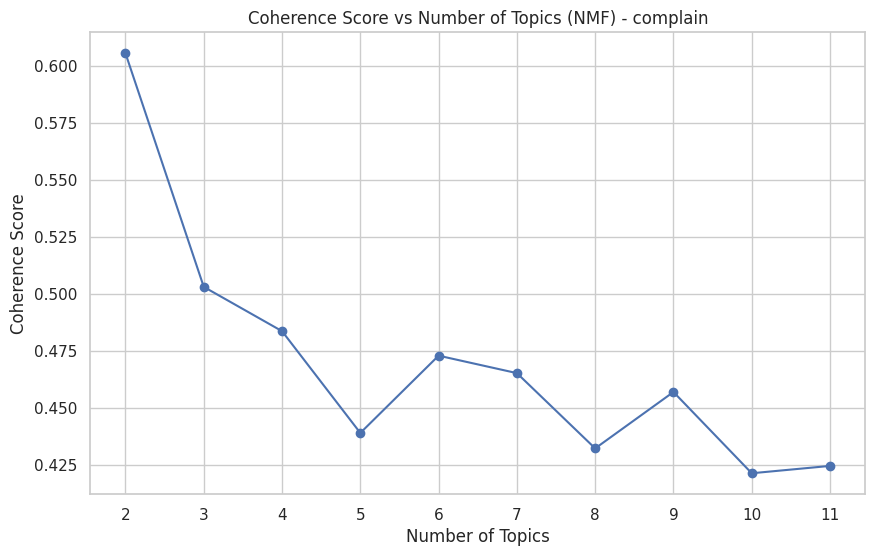

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


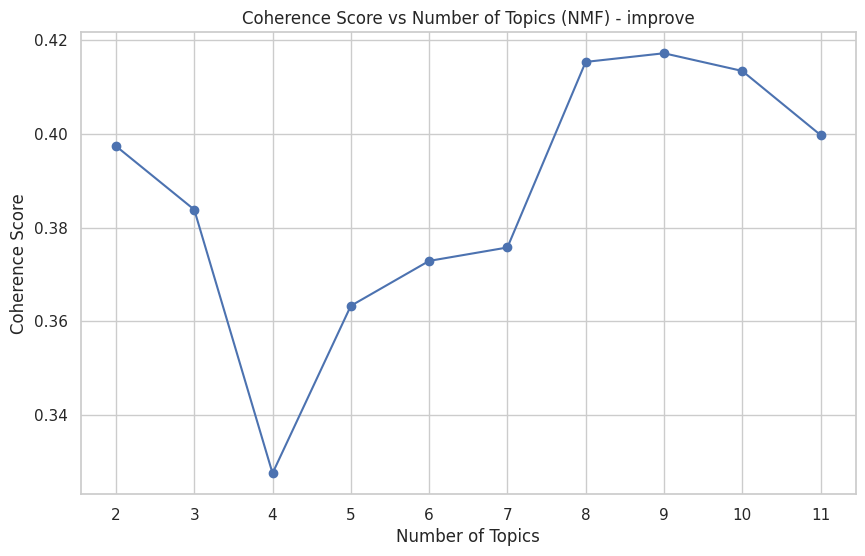

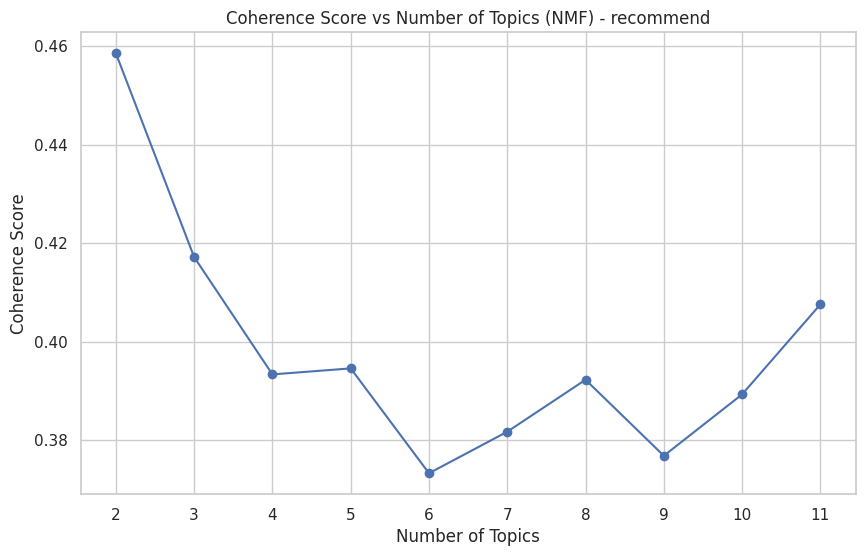

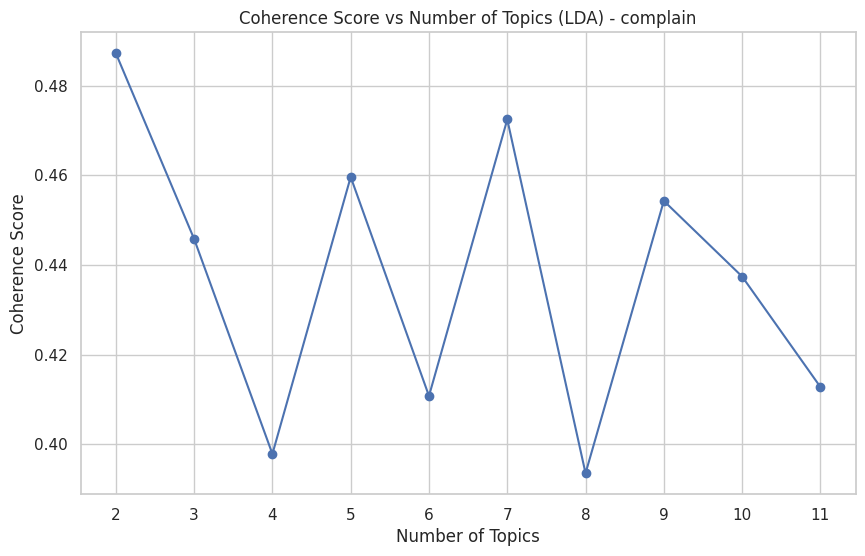

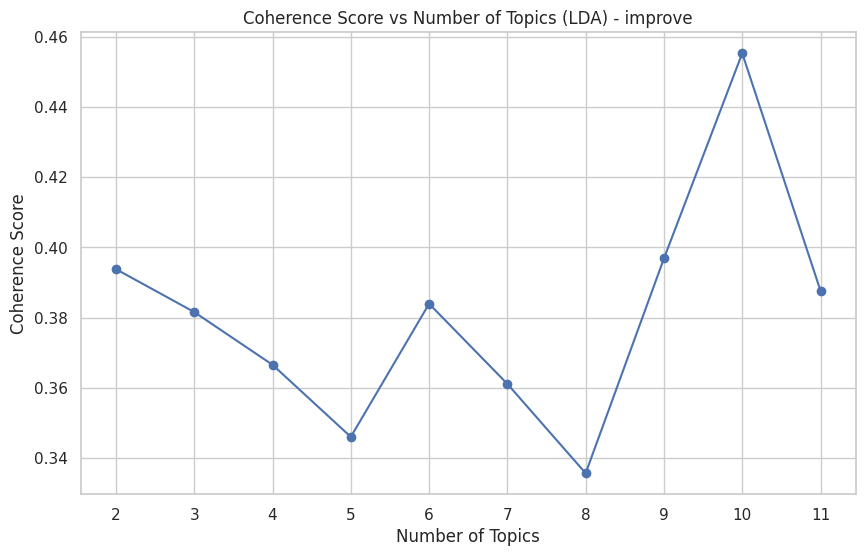

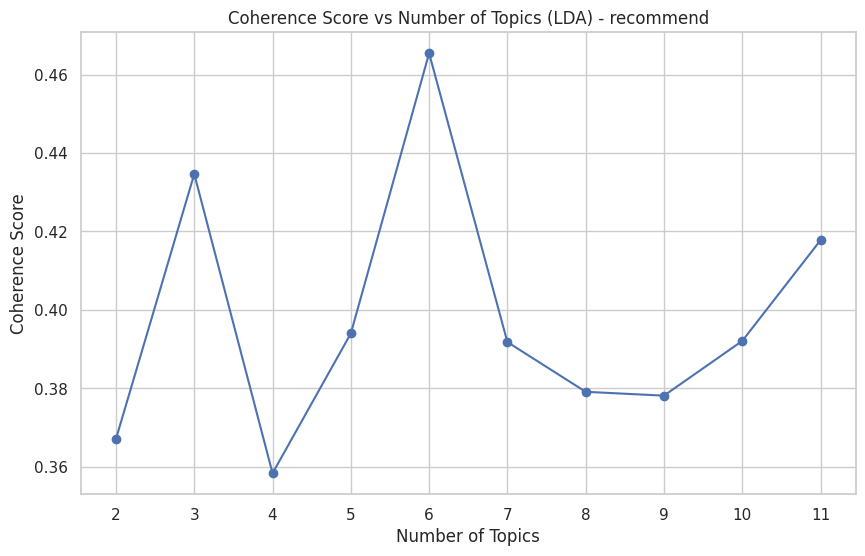

In [ ]:
# using nmf model
corpus_complain, texts_complain, X_complain, feature_names_complain, vectorizer_complain = prepare_input_tf(df_complain, 'complain')
df_complain_result = model_process(
    df_complain, 'complain', corpus_complain, texts_complain, X_complain, feature_names_complain, vectorizer_complain, method='nmf'
)
corpus_improve, texts_improve, X_improve, feature_names_improve, vectorizer_improve = prepare_input_tf(df_improve, 'improve')
df_improve_result = model_process(
    df_improve, 'improve', corpus_improve, texts_improve, X_improve, feature_names_improve, vectorizer_improve, method='nmf'
)

corpus_recommend, texts_recommend, X_recommend, feature_names_recommend, vectorizer_recommend = prepare_input_tf(df_recommend, 'recommend')
df_recommend_result = model_process(
    df_recommend, 'recommend', corpus_recommend, texts_recommend, X_recommend, feature_names_recommend, vectorizer_recommend, method='nmf'
)

# try lda model
corpus_complain_count, texts_complain_count, X_complain_count, feature_names_complain_count, vectorizer_complain_count = prepare_input_count(df_complain, 'complain')
df_complain_result_count = model_process(
    df_complain, 'complain', corpus_complain_count, texts_complain_count, X_complain_count, feature_names_complain_count, vectorizer_complain_count, method='lda'
)

corpus_improve_count, texts_improve_count, X_improve_count, feature_names_improve_count, vectorizer_improve_count = prepare_input_count(df_improve, 'improve')
df_improve_result_count = model_process(
    df_improve, 'improve', corpus_improve_count, texts_improve_count, X_improve_count, feature_names_improve_count, vectorizer_improve_count, method='lda'
)

corpus_recommend_count, texts_recommend_count, X_recommend_count, feature_names_recommend_count, vectorizer_recommend_count = prepare_input_count(df_recommend, 'recommend')
df_recommend_result_count = model_process(
    df_recommend, 'recommend', corpus_recommend_count, texts_recommend_count, X_recommend_count, feature_names_recommend_count, vectorizer_recommend_count, method='lda'
)



## Generate Phrases
<a name="generate-phrases"></a>

The function of the generate_meaningful_phrases method is to automatically generate more semantically valuable phrases (phrases) based on each line of the keyword list, which is used to combine the readability of the subject words.

This method receives a list of keywords (such as the keyword list of each text), performs syntactic structure combination on each group of keywords, and generates meaningful phrases with semantic weights. Skip the list with less than 2 keywords, and use nltk.pos_tag to tag the keywords with part of speech (noun, adjective, verb, etc.). Reconstruct the weights, adjective & noun weight is 5, noun & adjective weight is 4, noun & noun weight is 3, verb & noun weight is 3, negation & verb or negation & verb & noun weight is 6 or 7. Add special word processing, such as rude, employee, etc. Remove duplicate phrases, sort by descending weight, and finally output the 5 phrases with the highest weight.

In [ ]:
def generate_meaningful_phrases(keywords_list):
  results = []
  for idx, keywords in enumerate(keywords_list):
      if len(keywords) < 2:
          results.append(keywords)
          continue

      try:
          tagged_words = pos_tag(keywords)
      except:
          tagged_words = [(word, '') for word in keywords]


      # pos words by part of speech
      nouns = [word for word, tag in tagged_words if tag.startswith('N')]
      adjectives = [word for word, tag in tagged_words if tag.startswith('J')]
      verbs = [word for word, tag in tagged_words if tag.startswith('V')]

      phrases = []

      # Adjective & Noun
      for adj in adjectives:
          for noun in nouns:
              phrase = f"{adj} {noun}"
              phrases.append((phrase, 5))

      # noun & adjective
      bad_word = ["horrible", "rude", "bad", "terrible", "slow", "dirty", "unfriendly", "incompetent", "unhelpful", "long", "poor", "messy", "crowded", "broken"]
      for noun in nouns:
          for adj in adjectives:
              if adj in bad_word:
                  phrase = f"{noun} {adj}"
                  phrases.append((phrase, 4))

      # Noun & Noun
      for n1, n2 in permutations(nouns, 2):
          phrase = f"{n1} {n2}"
          phrases.append((phrase, 3))

      # Verb & Noun
      for verb in verbs:
          for noun in nouns:
              phrase = f"{verb} {noun}"
              phrases.append((phrase, 3))

      # Check for common negative phrases
      negation_words = [
          "not", "no", "never", "none", "nobody", "nothing", "nowhere", "neither",
          "don't", "doesn't", "didn't", "won't", "wouldn't", "can't", "couldn't",
          "shouldn't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't",
          "hadn't", "mustn't", "mightn't", "needn't"
      ]
      for neg in negation_words:
          if neg in keywords:
              for verb in verbs:
                  phrase = f"{neg} {verb}"
                  phrases.append((phrase, 6))

                  # Negation of verb & noun
                  for noun in nouns:
                      phrase = f"{neg} {verb} {noun}"
                      phrases.append((phrase, 7))

      # Handling special phrases and context
      if 'rude' in keywords and any(word in keywords for word in ['employee', 'service']):
          if 'employee' in keywords:
              phrases.append(("rude employee", 8))
          if 'service' in keywords:
              phrases.append(("rude service", 8))

      if 'friendly' in keywords and 'employee' in keywords:
          phrases.append(("friendly employee", 8))

      # remove duplicate
      unique_phrases = {}
      for phrase, weight in phrases:
          # remove phrase space
          norm_phrase = re.sub(r'\s+', ' ', phrase).strip()
          if norm_phrase not in unique_phrases or weight > unique_phrases[norm_phrase]:
              unique_phrases[norm_phrase] = weight

      # sort by desc
      sorted_phrases = sorted(unique_phrases.items(), key=lambda x: x[1], reverse=True)


      # return 5 phrase by weight
      top_phrases = [phrase for phrase, _ in sorted_phrases[:5]]
      results.append(top_phrases)

  return results


In [ ]:
# generate phrase by TfidfVectorizer model
topic_names_complain_with_keyword = generate_meaningful_phrases(df_complain_result['doc_keywords_complain_nmf'])
df_complain_result["themes_TfidfVectorizer_complain"] = topic_names_complain_with_keyword

topic_names_improve_with_keyword = generate_meaningful_phrases(df_improve_result['doc_keywords_improve_nmf'])
df_improve_result["themes_TfidfVectorizer_complain"] = topic_names_improve_with_keyword

topic_names_recommend_with_keyword = generate_meaningful_phrases(df_recommend_result['doc_keywords_recommend_nmf'])
df_recommend_result["themes_TfidfVectorizer_complain"] = topic_names_recommend_with_keyword


# generate phrase by countVectorizer model
topic_names_complain_with_key_count = generate_meaningful_phrases(df_complain_result_count['doc_keywords_complain_lda'])
df_complain_result["themes_countVectorizer_complain"] = topic_names_complain_with_key_count

topic_names_improve_with_key_count = generate_meaningful_phrases(df_improve_result_count['doc_keywords_improve_lda'])
df_improve_result["themes_countVectorizer_complain"] = topic_names_improve_with_key_count

topic_names_recommend_with_key_count = generate_meaningful_phrases(df_recommend_result_count['doc_keywords_recommend_lda'])
df_recommend_result["themes_countVectorizer_complain"] = topic_names_recommend_with_key_count

# append column
df_complain_result["doc_keywords_complain_lda"] = df_complain_result_count['doc_keywords_complain_lda']
df_improve_result["doc_keywords_complain_lda"] = df_improve_result_count['doc_keywords_improve_lda']
df_recommend_result["doc_keywords_complain_lda"] = df_recommend_result_count['doc_keywords_recommend_lda']


In [ ]:
display(df_complain_result.head())

,complain,doc_keywords_complain_nmf,complain_topic_idx,complain_topic_prob,themes_TfidfVectorizer_complain,themes_countVectorizer_complain,sentiment_complain_bert,doc_keywords_complain_lda
0,the customer service that your company gives i...,"[company, customer, tacky, morality, empathy]",1,0.249186,"[tacky company, tacky customer, tacky morality...","[customer service, customer line, customer che...",negative,"[customer, service, line, checkout, need]"
1,i would complain about how more registers need...,"[available, day, register, need, complain]",0,0.099343,"[available day, available need, available comp...","[customer service, customer line, customer che...",negative,"[customer, service, line, checkout, need]"
2,why do you quit taking cash at the checkout an...,"[coin, sham, conspiracy, excuse, blame]",1,0.058589,"[coin sham, coin conspiracy, coin excuse, coin...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]"
3,you dont just go into walmart and run out for ...,"[chore, eventually, run, time, thing]",1,0.088064,"[chore time, chore thing, time chore, time thi...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]"
4,east waco needs a walmart neighborhood grocery...,"[east, waco, neighborhood, grocery, need]",1,0.082901,"[east waco, east neighborhood, east grocery, e...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]"


### Sentiment Analysis - BERT fine-tuned model and NLTK(VADER)

<a name="sentiment-analysis---bert-fine-tuned-model-and-nltk-vader"></a>

In [ ]:
# reinstall numpy 1.26.4 for transformers model
!pip uninstall -y numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_uninstall.py", line 367, in remove
    for_rename = compress_for_rename(self._paths)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/req/req_uninstall.py", line 128, in compress_for_rename
    for dirname, subdirs, files in os.walk(root):
  File "<

In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np

In [9]:
!pip install transformers==4.36.2

  Using cached transformers-4.36.2-py3-none-any.whl.metadata (126 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.36.2-py3-none-any.whl (8.2 MB)
Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.2 which is incompatible.


In [10]:
!pip install torch

In [11]:
print(np.__version__)

# if version not correct run
# import os
# os.kill(os.getpid(), 9)

1.26.4


In [12]:
from transformers import pipeline

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


## NLTK(VADER)

<a name="nltk-vader"></a>

The **perform_sentiment_analysis** method is based on NLTK's Valence Aware Dictionary and sEntiment Reasoner (VADER) to implement sentiment analysis on text data. It is unsupervised and does not require additional training. Get four sentiment scores pos, neu, neg, and a comprehensive score compound.
The method treats empty or non-string as neutral. Otherwise, call the sid.polarity_scores() method to get the sentiment score. Use compound to get the three sentiment words positive, negative, and neutral.



In [ ]:
# sentiment analysis by SentimentIntensityAnalyzer
def perform_sentiment_analysis(df, text_column):
    sid = SentimentIntensityAnalyzer()

    # score count
    sentiments = []
    for text in df[text_column].fillna(''):
        if not isinstance(text, str) or text == '':
            sentiments.append('neutral')
            continue

        scores = sid.polarity_scores(text)
        compound = scores['compound']

        if compound >= 0.05:
            sentiment = 'positive'
        elif compound <= -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        sentiments.append(sentiment)
    df_name = f'sentiment'+'_'+text_column
    # sentiment count
    df[df_name] = sentiments
    sentiment_counts = Counter(sentiments)

    return df

In [ ]:
# df_complain_final = perform_sentiment_analysis(df_complain_result, 'complain')
# df_improve_final = perform_sentiment_analysis(df_improve_result, 'improve')
# df_recommend_final = perform_sentiment_analysis(df_recommend_result, 'recommend')

## BERT fine-tuned model
<a name="bert-fine-tuned-model"></a>

**bert_sentiment_analysis** uses the BERT fine-tuned model (distilbert-base-uncased-finetuned-sst-2-english) to perform sentiment classification analysis on text data. It has a higher accuracy than VADER.
In the method, if the content is empty or all spaces, the value is assigned to 'neutral'. Otherwise, the first 512 characters of the text are predicted. The sentiment result processing returns two values ​​'label' and 'score'.

In [ ]:
# sentiment analysis by BERT model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def bert_sentiment_analysis(df, text_column):
    sentiments = []

    for text in df[text_column].fillna('').astype(str).tolist():
        if not text.strip():
            sentiments.append('neutral')
            continue

        result = sentiment_pipeline(text[:512])[0]
        label = result['label'].lower()
        sentiments.append(label)

    df[f'sentiment_{text_column}_bert'] = sentiments
    return df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df_complain_final = bert_sentiment_analysis(df_complain_result, 'complain')
print(df_complain_final[['complain', 'sentiment_complain_bert']].head())

                                            complain sentiment_complain_bert
0  the customer service that your company gives i...                negative
1  i would complain about how more registers need...                negative
2  why do you quit taking cash at the checkout an...                negative
3  you dont just go into walmart and run out for ...                negative
4  east waco needs a walmart neighborhood grocery...                negative


In [ ]:
df_improve_final = bert_sentiment_analysis(df_improve_result, 'improve')
print(df_improve_final[['improve', 'sentiment_improve_bert']].head())

                                             improve sentiment_improve_bert
0  their overall approach to customers and the be...               positive
1        target still has a snack bar unlike walmart               positive
2  the environment in which to shop at target is ...               positive
3  it at least supports lgbtq rights and pays better               negative
4  the thing that i target does better is they al...               negative


In [ ]:
df_recommend_final = bert_sentiment_analysis(df_recommend_result, 'recommend')
print(df_recommend_final[['recommend', 'sentiment_recommend_bert']].head())

                                           recommend sentiment_recommend_bert
0                theres nothing i love about walmart                 negative
1   i love the diversity of products that they offer                 positive
2  the employees they try when you finely hnt one...                 negative
3  in the small town that i live in walmart is no...                 positive
4                                      the low price                 negative


## Visualization and Merge Dataframe
<a name="visualization-and-merge-dataframe"></a>

Display a bar chart of sentiment analysis for visualization, merge all data into a new dataframe and save it as a csv file through google colab

In [ ]:
max_len = max(len(df_complain_final), len(df_improve_final), len(df_recommend_final))

def pad_dataframe(df, max_len):
    return df.reindex(range(max_len)).fillna('')

df_complain_padded = pad_dataframe(df_complain_final, max_len)
df_improve_padded = pad_dataframe(df_improve_final, max_len)
df_recommend_padded = pad_dataframe(df_recommend_final, max_len)

df_combined_final = pd.concat([df_complain_padded, df_improve_padded, df_recommend_padded], axis=1)

display(df_combined_final.head())


,complain,doc_keywords_complain_nmf,complain_topic_idx,complain_topic_prob,themes_TfidfVectorizer_complain,themes_countVectorizer_complain,sentiment_complain_bert,doc_keywords_complain_lda,improve,doc_keywords_improve_nmf,...,sentiment_improve_bert,doc_keywords_complain_lda,recommend,doc_keywords_recommend_nmf,recommend_topic_idx,recommend_topic_prob,themes_TfidfVectorizer_complain,themes_countVectorizer_complain,sentiment_recommend_bert,doc_keywords_complain_lda
0,the customer service that your company gives i...,"[company, customer, tacky, morality, empathy]",1,0.249186,"[tacky company, tacky customer, tacky morality...","[customer service, customer line, customer che...",negative,"[customer, service, line, checkout, need]",their overall approach to customers and the be...,"[community, overall, approach, benefit, support]",...,positive,"[target, like, presentation, clean, end]",theres nothing i love about walmart,"[love, walmart]",1,0.357008,[love walmart],"[low price, low walmart, low variety, price wa...",negative,"[price, low, love, walmart, variety]"
1,i would complain about how more registers need...,"[available, day, register, need, complain]",0,0.099343,"[available day, available need, available comp...","[customer service, customer line, customer che...",negative,"[customer, service, line, checkout, need]",target still has a snack bar unlike walmart,"[bar, unlike, snack, walmart, target]",...,positive,"[store, target, organize, walmart, clean]",i love the diversity of products that they offer,"[diversity, offer, product, love]",1,0.142691,"[diversity product, diversity love, product di...","[great product, great service, product service...",positive,"[product, need, great, walmart, service]"
2,why do you quit taking cash at the checkout an...,"[coin, sham, conspiracy, excuse, blame]",1,0.058589,"[coin sham, coin conspiracy, coin excuse, coin...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]",the environment in which to shop at target is ...,"[relaxed, anxiety, environment, shop, target]",...,positive,"[target, like, presentation, clean, end]",the employees they try when you finely hnt one...,"[hnt, finely, try, employee]",1,0.011754,"[hnt employee, employee hnt, try hnt, try empl...","[great product, great service, product service...",negative,"[product, need, great, walmart, service]"
3,you dont just go into walmart and run out for ...,"[chore, eventually, run, time, thing]",1,0.088064,"[chore time, chore thing, time chore, time thi...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]",it at least supports lgbtq rights and pays better,"[lgbtq, right, pay, support]",...,negative,"[store, target, organize, walmart, clean]",in the small town that i live in walmart is no...,"[place, socialize, small, town, live]",1,0.148656,"[small place, small town, live place, live tow...","[price store, store price, walmart price, walm...",positive,"[need, walmart, price, store, like]"
4,east waco needs a walmart neighborhood grocery...,"[east, waco, neighborhood, grocery, need]",1,0.082901,"[east waco, east neighborhood, east grocery, e...","[walmart complain, walmart store, walmart item...",negative,"[walmart, complain, store, item, employee]",the thing that i target does better is they al...,"[store, big, plus, food, wider]",...,negative,"[store, customer, service, target, high]",the low price,"[low, price]",0,0.382856,[low price],"[low price, low walmart, low variety, price wa...",negative,"[price, low, love, walmart, variety]"


<ipython-input-41-8693d8385124>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axs[i], palette="pastel")
<ipython-input-41-8693d8385124>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axs[i], palette="pastel")
<ipython-input-41-8693d8385124>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axs[i], palette="pastel")


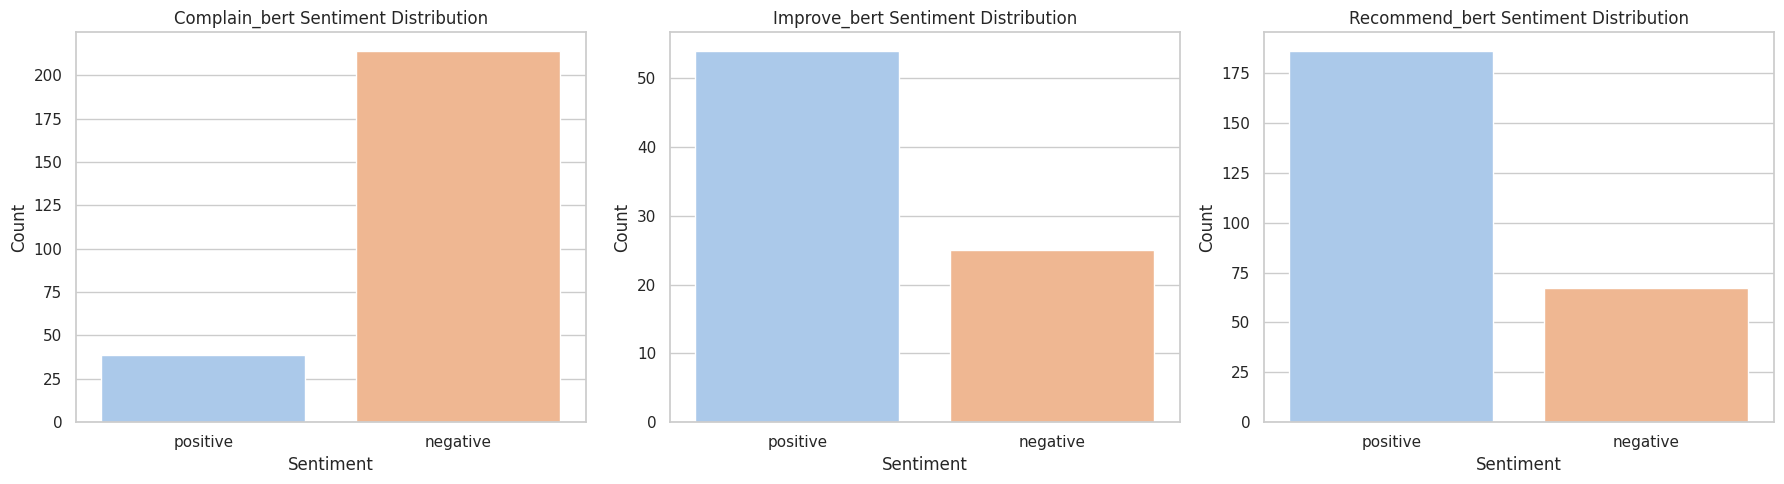

In [ ]:
# sentiment plot
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(["sentiment_complain_bert", "sentiment_improve_bert", "sentiment_recommend_bert"]):
    sentiment_counts = df_combined_final[col].value_counts().reindex(["positive", "negative"], fill_value=0)
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axs[i], palette="pastel")
    axs[i].set_title(f"{col.replace('sentiment_', '').capitalize()} Sentiment Distribution")
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("Sentiment")

plt.tight_layout()
plt.show()

In [ ]:
# save as csv
df_combined_final.to_csv("walmart_themes_combined.csv", index=False)

# colab download
files.download("walmart_themes_combined.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

 This study shows that traditional topic modeling techniques combined with careful preprocessing and structured keyword extraction can still gain meaningful insights from customer feedback data. In the analysis of the Walmart dataset, it can be seen that the original data *the customer service that your company gives is horrible and tacky your company has no morality or empathy for its customers all you care about is profits over customer* NMF extracts `['company', 'customer', 'tacky', 'morality', 'empathy']` while LDA extracts the topic words `['community', 'overall', 'approach', 'benefit', 'support']`. The data shows that the TF-IDF + NMF model is more expressive in expressing the keywords related to derogatory and moral sentiments in sentences (such as "tacky", "morality", "empathy"), while LDA tends to extract frequently occurring neutral words, which is more advantageous in topic generalization.


The TF-IDF + NMF model performs well in short text semantic expression and topic interpretability, and is suitable for business scenarios that require semantically clear and easy-to-understand output. The CountVectorizer + LDA model is more suitable for analyzing the distribution of high-frequency topics in large text corpora. In practical applications, the appropriate modeling combination can be selected according to the data characteristics and analysis purposes to obtain the best insight effect. In addition, the combination of sentiment analysis methods (such as VADER and BERT) further enhances the multi-dimensional understanding of user feedback, providing data support and decision-making basis for subsequent user satisfaction improvements.


It is worth mentioning that with the rapid development of large language models (LLMs) in recent years, such as ChatGPT, BERT and its derivative models, they have shown significant advantages in complex semantic tasks such as context understanding, sentiment capture, and sarcasm recognition. Future research can further explore the combination of traditional modeling methods with LLM, or directly use pre-trained language models for end-to-end topic identification and sentiment analysis. This fusion method is expected to improve the depth and accuracy of the model in natural language understanding while maintaining interpretability, thereby providing a more intelligent and comprehensive solution for user feedback analysis.

## Reference
<a name="reference"></a>

1. https://aclanthology.org/P13-2007.pdf
2. Hands-On Natural Language Processing with Python : A Practical Guide to Applying Deep Learning Architectures to Your NLP Applications
3. https://arxiv.org/pdf/2203.05794
4. https://www.frontiersin.org/journals/sociology/articles/10.3389/fsoc.2022.886498/full